# Import packages

In [1]:
#import everything
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
import numpy
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pandas

In [2]:
from tifffile import imsave
from tifffile import imread
from PIL import Image

In [3]:
#define things we need from allensdk
mcc = MouseConnectivityCache(resolution=25, manifest_file='connectivity/mouse_connectivity_manifest.json')
# open up a list of all of the experiments
all_experiments = mcc.get_experiments(dataframe=True)
# grab the StructureTree instance (class?)
structure_tree = mcc.get_structure_tree()
#get the list of ids that correspond to acronyms
id_acronym = structure_tree.get_id_acronym_map()

# Define functions

In [4]:
def get_center(region_mask):
    n0, n1, n2 = numpy.shape(region_mask)
    x_axis=list() #2
    y_axis=list() #1
    z_axis=list() #0
    n2half=int(n2/2)
    for r in range(n0):
        datum=region_mask[r,:,:]
        if numpy.any(datum == 1):
            z_axis.append(r)
    for r in range(n1):
        datum=region_mask[:,r,:]
        if numpy.any(datum == 1):
            y_axis.append(r)
    for r in range(n2half): #x is weird since hemispheres will make this always center
        #and not in the region
        #so we slice brain in half and get center of region in one hemisphere
        datum=region_mask[:,:,r]
        if numpy.any(datum == 1):
            x_axis.append(r)
    z_min=min(z_axis)
    z_max=max(z_axis)
    print('z min: '+str(z_min))
    print('z max: '+str(z_max))
    z_center=int((z_min+z_max)/2)
    x_min=min(x_axis)
    x_max=max(x_axis)
    print('x min: '+str(x_min))
    print('x max: '+str(x_max))
    x_center=int((x_min+x_max)/2)
    y_min=min(y_axis)
    y_max=max(y_axis)
    print('y min: '+str(y_min))
    print('y max: '+str(y_max))
    y_center=int((y_min+y_max)/2)
    return x_center, y_center, z_center

In [5]:
def plot_region(slice_idx,region_mask,region_title,x,y):
    f, ccf_axes = plt.subplots(1, 3, figsize=(15, 6))

    ccf_axes[0].imshow(template[slice_idx,:,:], cmap='gray', aspect='equal', vmin=template.min(), vmax=template.max())
    ccf_axes[0].imshow(region_mask[slice_idx,:,:], cmap='gray', aspect='equal', vmin=0, vmax=1,alpha=0.3)
    ccf_axes[0].scatter(x,y,s=3,c='red')
    ccf_axes[0].set_title("registration template")

    ccf_axes[1].imshow(annot[slice_idx,:,:], cmap='gray', aspect='equal', vmin=0, vmax=2000)
    ccf_axes[1].imshow(region_mask[slice_idx,:,:], cmap='gray', aspect='equal', vmin=0, vmax=1,alpha=0.3)
    ccf_axes[1].scatter(x,y,s=3,c='red')
    ccf_axes[1].set_title("annotation volume")

    ccf_axes[2].imshow(region_mask[slice_idx,:,:], cmap='gray', aspect='equal', vmin=0, vmax=1)
    ccf_axes[2].set_title(region_title)
    ccf_axes[2].scatter(x,y,s=3,c='red')

    plt.show()

In [6]:
# data mask:
template, template_info = mcc.get_template_volume()
annot, annot_info = mcc.get_annotation_volume()

# in addition to the annotation volume, you can get binary masks for individual structures
# GPe_mask, gpe_info = mcc.get_structure_mask(1022)
# GPi_mask, gpi_info = mcc.get_structure_mask(1031)

In [7]:
# init lists
brain_regs = []
x_coords = []
y_coords = []
z_coords = []

# Anterior Cortex - manually chose points

earlier suggestion: sum PL ILA, ORB, GU, AI, MOs, MOp

z min: 75
z max: 163
x min: 180
x max: 227
y min: 81
y max: 136


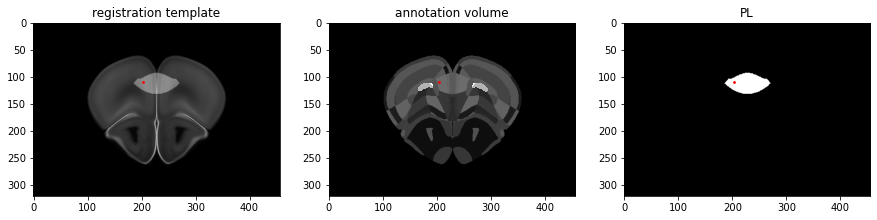

unadjusted center - 
x: 203
y: 108
z: 119


In [8]:
#define brain region by acronym
brain_reg='PL'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))

brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

z min: 119
z max: 161
x min: 188
x max: 227
y min: 130
y max: 178


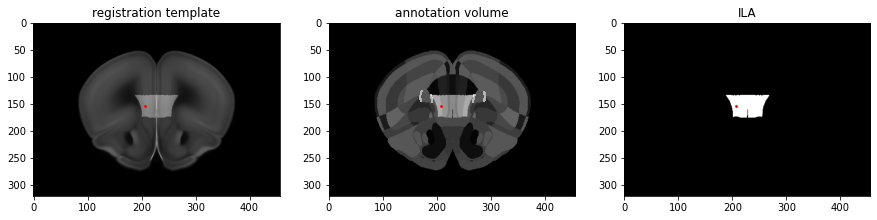

unadjusted center - 
x: 207
y: 154
z: 140


In [9]:
#define brain region by acronym
brain_reg='ILA'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

z min: 76
z max: 153
x min: 143
x max: 227
y min: 109
y max: 191


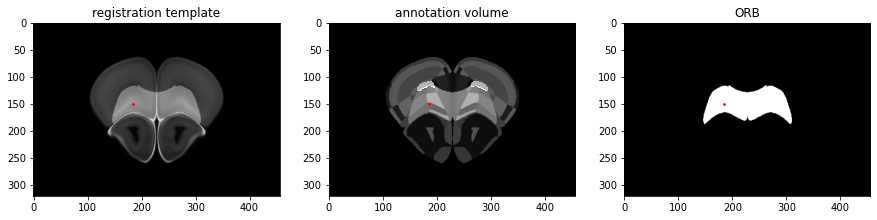

unadjusted center - 
x: 185
y: 150
z: 114


In [10]:
#define brain region by acronym
brain_reg='ORB'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

z min: 140
z max: 237
x min: 41
x max: 117
y min: 157
y max: 200


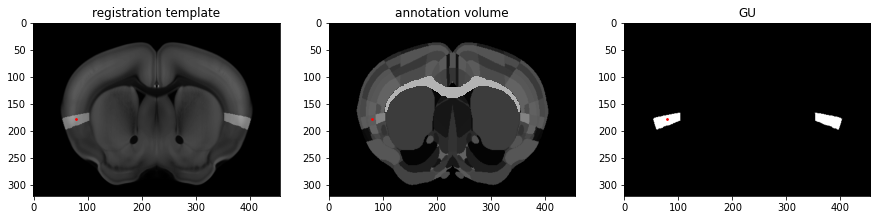

unadjusted center - 
x: 79
y: 178
z: 188


In [11]:
#define brain region by acronym
brain_reg='GU'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

z min: 81
z max: 289
x min: 28
x max: 169
y min: 132
y max: 222


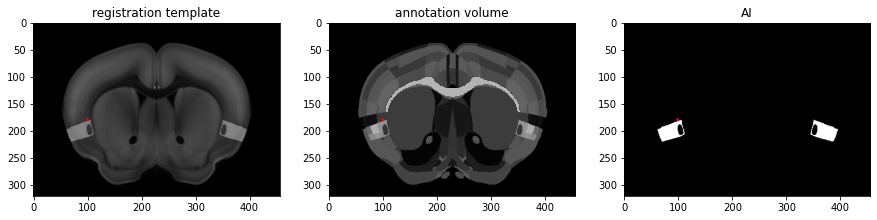

unadjusted center - 
x: 98
y: 177
z: 185


In [12]:
#define brain region by acronym
brain_reg='AI'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

z min: 107
z max: 259
x min: 83
x max: 198
y min: 19
y max: 173


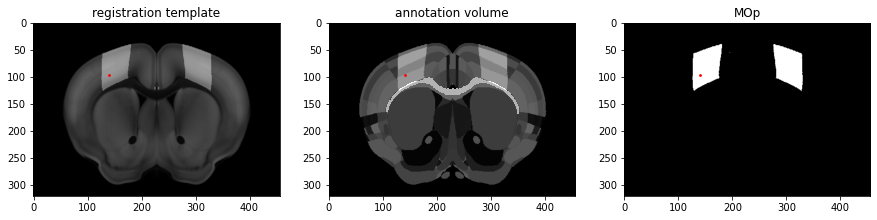

unadjusted center - 
x: 140
y: 96
z: 183


In [13]:
#define brain region by acronym
brain_reg='MOp'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

z min: 77
z max: 258
x min: 111
x max: 226
y min: 19
y max: 154


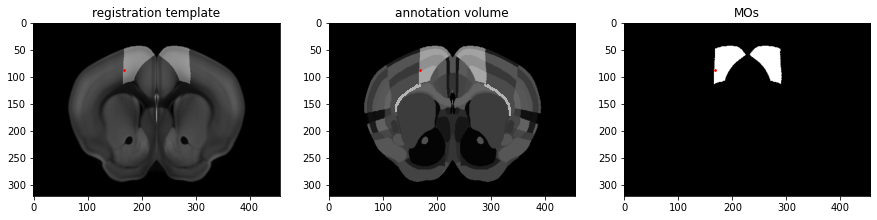

unadjusted center - 
x: 168
y: 86
z: 167


In [14]:
#define brain region by acronym
brain_reg='MOs'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

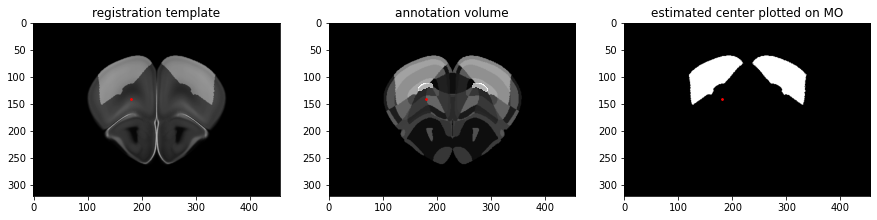

adjusted center - 
x: 180
y: 140
z: 119


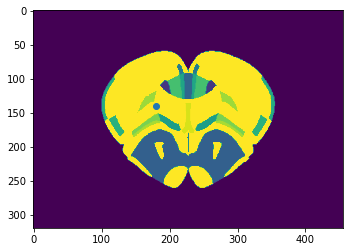

In [15]:
#define brain region by acronym
#x=int((28+227)/2)
#y=int((19+222)/2)
x=180
y=140
z=int((75+163)/2)
slice_idx = z
#took min min of printed values above, and max max of values above, averaged
region_title='estimated center plotted on MO'
plot_region(slice_idx,region_mask,region_title,x,y)
print('adjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
plt.imshow(template[z,:,:], aspect='equal', vmin=template.min(), vmax=template.max())
plt.scatter(x,y)
#im = Image.fromarray(template[z,:,:])
plt.savefig('ant_cortex_temp.png')
#im = Image.fromarray(annot[z,:,:])
plt.imshow(annot[z,:,:], aspect='equal', vmin=template.min(), vmax=template.max())
plt.savefig('ant_cortex_annot.png')

# BNST - use unadjusted

BNST is BST in allen (Bed nuclei of the stria terminalis)

z min: 187
z max: 236
x min: 168
x max: 209
y min: 154
y max: 234


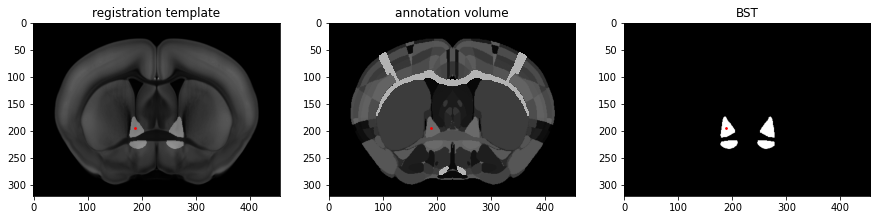

unadjusted center - 
x: 188
y: 194
z: 211


In [16]:
#define brain region by acronym
brain_reg='BST'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

# CeA - use unadjusted

CEA = Central amygdalar nucleus

z min: 234
z max: 298
x min: 99
x max: 149
y min: 203
y max: 250


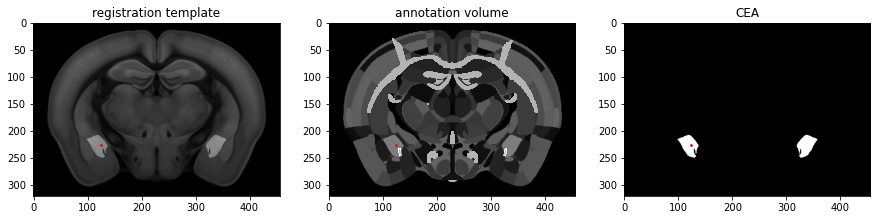

unadjusted center - 
x: 124
y: 226
z: 266


In [17]:
#define brain region by acronym
brain_reg='CEA'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

# DCN - use unadjusted

cerebellar nuclei (could not find deep) in Allen Atlas is CBN

z min: 432
z max: 489
x min: 116
x max: 207
y min: 129
y max: 187


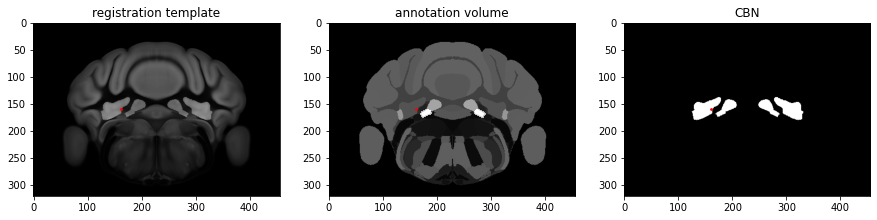

unadjusted center - 
x: 161
y: 158
z: 460


In [18]:
#define brain region by acronym
brain_reg='CBN'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

# DR - use unadjusted

in the Allen Atlas DR = Dorsal nucleus raphe

z min: 376
z max: 414
x min: 222
x max: 227
y min: 129
y max: 185


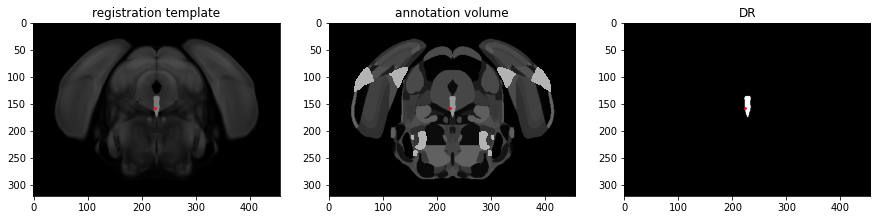

unadjusted center - 
x: 224
y: 157
z: 395


In [19]:
#define brain region by acronym
brain_reg='DR'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

2021-12-18 17:00:52,438 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_795.nrrd


z min: 292
z max: 424
x min: 185
x max: 227
y min: 71
y max: 190


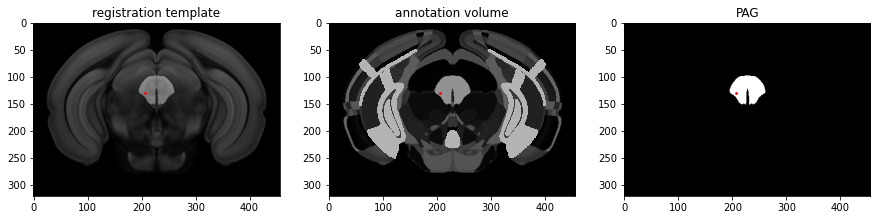

unadjusted center - 
x: 206
y: 130
z: 358


In [20]:
#define brain region by acronym
brain_reg='PAG'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

# DStr - use unadjusted

Dorsal Striatum = STRd in allen

z min: 151
z max: 306
x min: 71
x max: 196
y min: 101
y max: 235


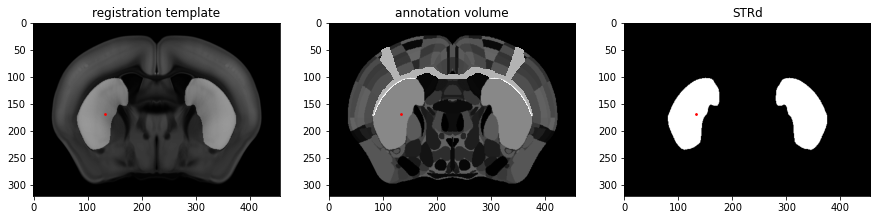

unadjusted center - 
x: 133
y: 168
z: 228


In [21]:
#define brain region by acronym
brain_reg='STRd'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

# EAM - manually chose points

Was previously advised to sum MEA, AAA, NLOT, COA, MA, BMA, NDB, EPv

z min: 230
z max: 304
x min: 121
x max: 165
y min: 211
y max: 287


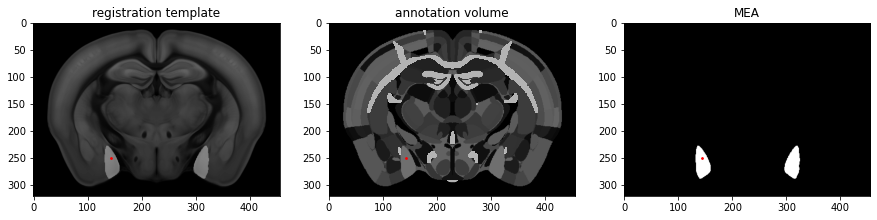

unadjusted center - 
x: 143
y: 249
z: 267


In [22]:
#define brain region by acronym
brain_reg='MEA'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

z min: 215
z max: 249
x min: 126
x max: 167
y min: 241
y max: 284


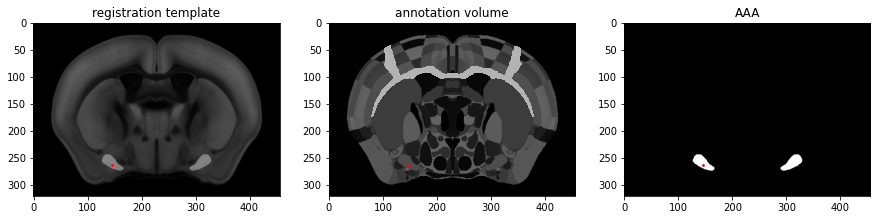

unadjusted center - 
x: 146
y: 262
z: 232


In [23]:
#define brain region by acronym
brain_reg='AAA'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

z min: 232
z max: 253
x min: 132
x max: 156
y min: 259
y max: 294


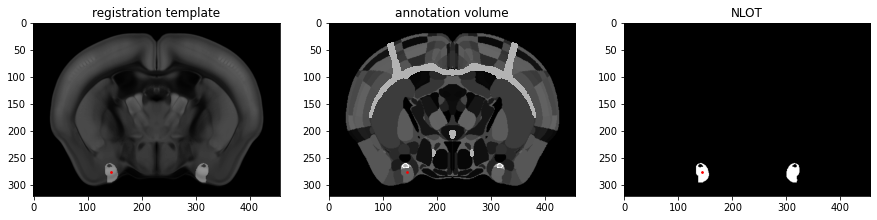

unadjusted center - 
x: 144
y: 276
z: 242


In [24]:
#define brain region by acronym
brain_reg='NLOT'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

z min: 221
z max: 362
x min: 85
x max: 154
y min: 248
y max: 300


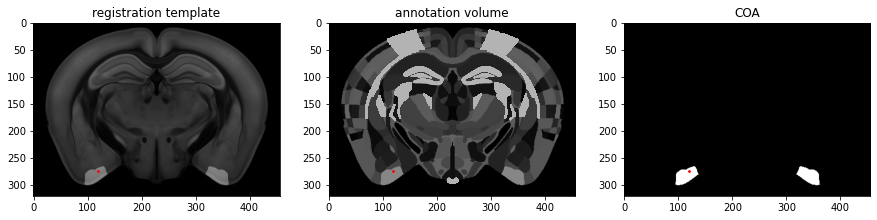

unadjusted center - 
x: 119
y: 274
z: 291


In [25]:
#define brain region by acronym
brain_reg='COA'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

z min: 192
z max: 234
x min: 135
x max: 185
y min: 245
y max: 277


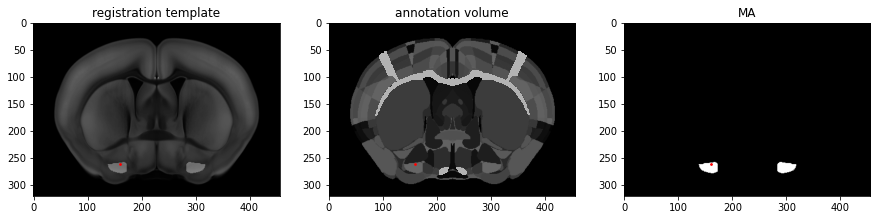

unadjusted center - 
x: 160
y: 261
z: 213


In [26]:
#define brain region by acronym
brain_reg='MA'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

z min: 227
z max: 328
x min: 90
x max: 139
y min: 227
y max: 278


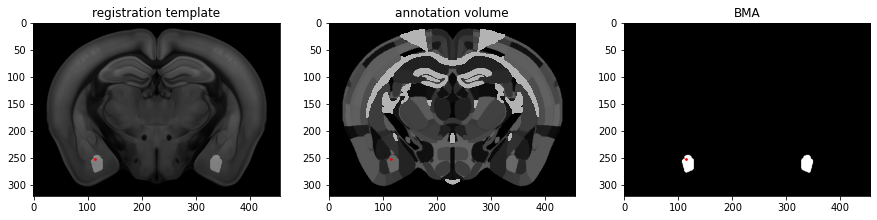

unadjusted center - 
x: 114
y: 252
z: 277


In [27]:
#define brain region by acronym
brain_reg='BMA'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

z min: 159
z max: 232
x min: 165
x max: 227
y min: 208
y max: 279


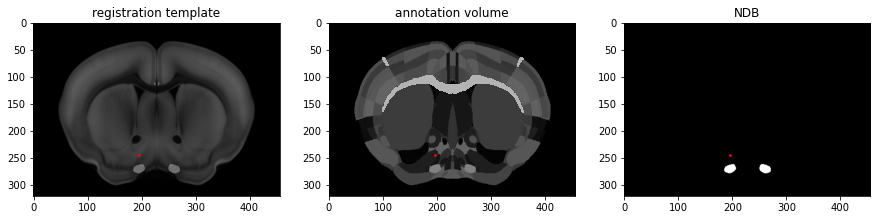

unadjusted center - 
x: 196
y: 243
z: 195


In [28]:
#define brain region by acronym
brain_reg='NDB'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

z min: 211
z max: 353
x min: 72
x max: 121
y min: 221
y max: 275


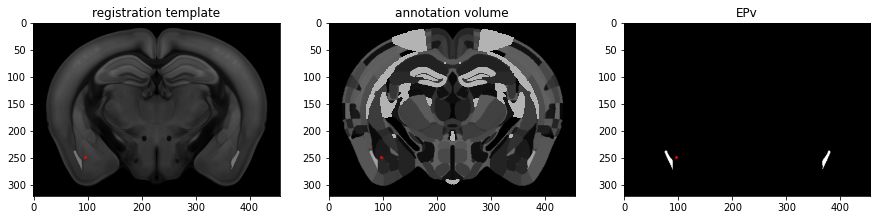

unadjusted center - 
x: 96
y: 248
z: 282


In [29]:
#define brain region by acronym
brain_reg='EPv'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

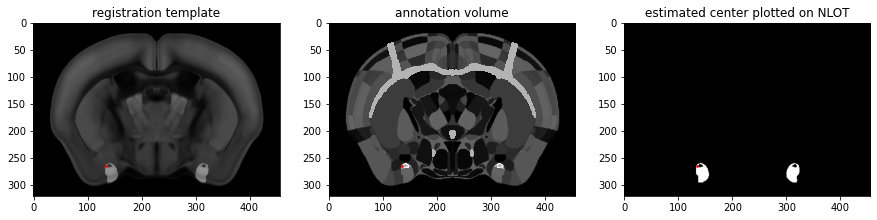

adjusted center - 
x: 135
y: 265
z: 242


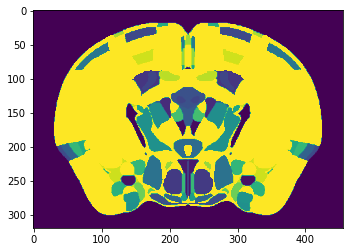

In [30]:
#define brain region by acronym
#x=int((72 + 227)/2)
#y=int((208 + 300)/2)
x=135
y=265
#z=int((159 + 362)/2)
z=242
slice_idx=z
#took min min of printed values above, and max max of values above, averaged
region_title='estimated center plotted on NLOT' 
brain_reg='NLOT'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
plot_region(slice_idx,region_mask,region_title,x,y)
print('adjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
plt.imshow(template[z,:,:], aspect='equal', vmin=template.min(), vmax=template.max())
#im = Image.fromarray(template[z,:,:])
plt.savefig('EAM_temp.png')
#im = Image.fromarray(annot[z,:,:])
plt.imshow(annot[z,:,:], aspect='equal', vmin=template.min(), vmax=template.max())
plt.savefig('EAM_annot.png')

# EP - use unadjusted

z min: 246
z max: 278
x min: 124
x max: 164
y min: 183
y max: 224


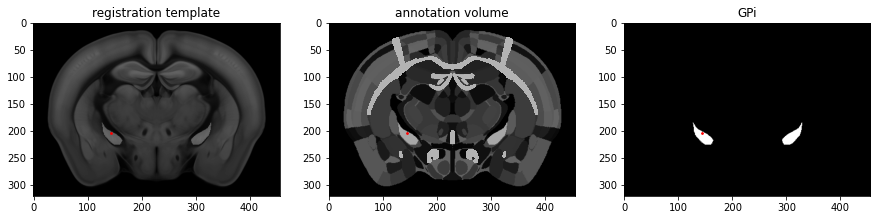

unadjusted center - 
x: 144
y: 203
z: 262


In [31]:
#define brain region by acronym
brain_reg='GPi'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

# GP / GPe - use unadjusted

Sometimes in the various drug data sets this is labelled as GP, sometimes it is set as GPe. Here I will use GPe.

z min: 218
z max: 286
x min: 100
x max: 173
y min: 157
y max: 220


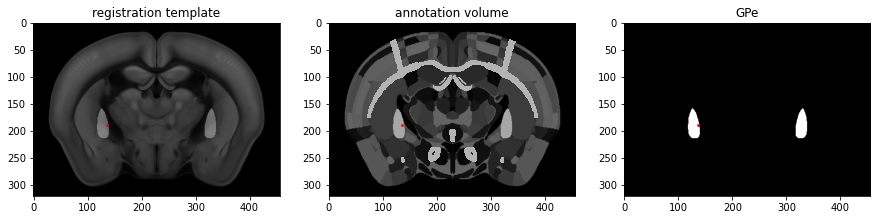

unadjusted center - 
x: 136
y: 188
z: 252


In [32]:
#define brain region by acronym
brain_reg='GPe'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

# LDT - use unadjusted

z min: 401
z max: 424
x min: 193
x max: 217
y min: 142
y max: 176


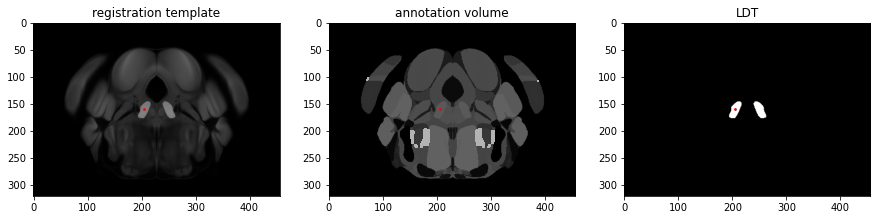

unadjusted center - 
x: 205
y: 159
z: 412


In [33]:
#define brain region by acronym
brain_reg='LDT'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

# LH - use unadjusted

z min: 232
z max: 314
x min: 156
x max: 206
y min: 213
y max: 265


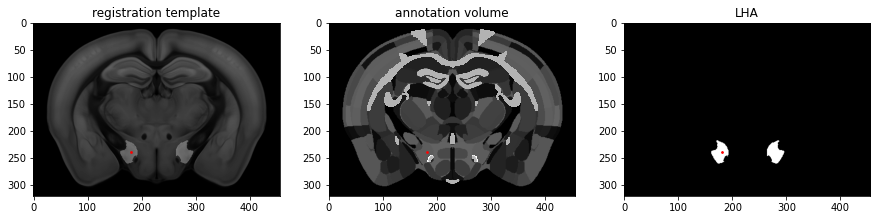

unadjusted center - 
x: 181
y: 239
z: 273


In [34]:
#define brain region by acronym
brain_reg='LHA'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

# LHb - use unadjusted

z min: 245
z max: 299
x min: 198
x max: 221
y min: 113
y max: 140


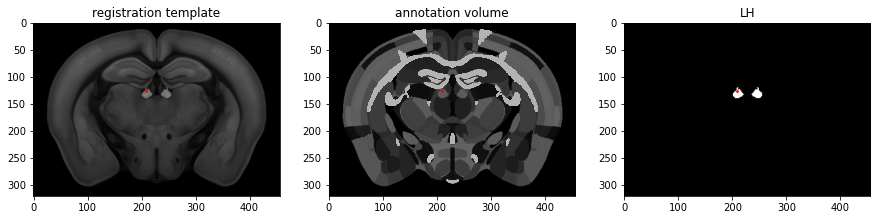

unadjusted center - 
x: 209
y: 126
z: 272


In [35]:
#define brain region by acronym
brain_reg='LH'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

# MHb - use unadjusted

z min: 243
z max: 303
x min: 208
x max: 226
y min: 103
y max: 140


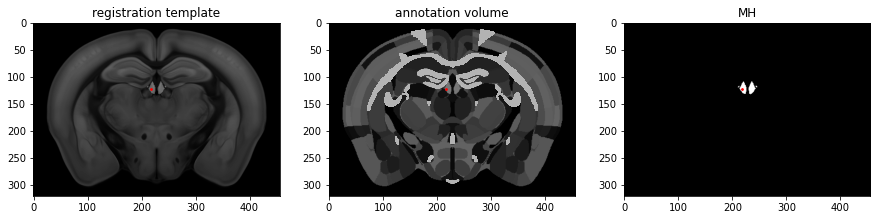

unadjusted center - 
x: 217
y: 121
z: 273


In [36]:
#define brain region by acronym
brain_reg='MH'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

# NAcCore - use unadjusted

NAc not broken into pieces in allen- will need to manually choose

z min: 138
z max: 201
x min: 125
x max: 214
y min: 186
y max: 264


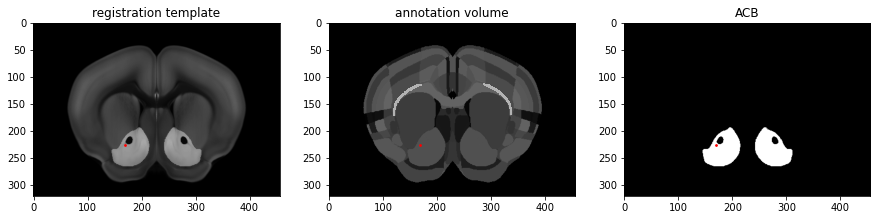

unadjusted center - 
x: 169
y: 225
z: 169


In [37]:
#define brain region by acronym
brain_reg='ACB'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

# NAcLAt - adjust x  and y to be towards outer edge

NAc not broken into pieces in allen- will need to manually choose

z min: 138
z max: 201
x min: 125
x max: 214
y min: 186
y max: 264


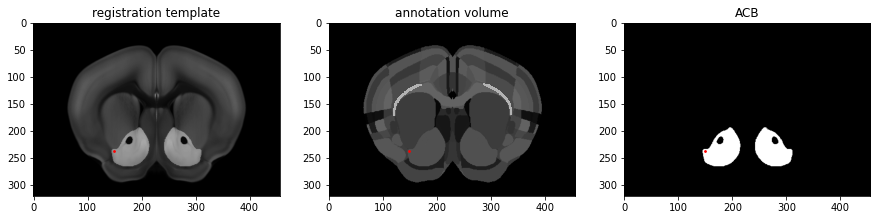

adjusted center - 
x: 149
y: 237
z: 169


In [38]:
#define brain region by acronym
brain_reg='ACB'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
x-=20
y+=12
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('adjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z)) 

# NAcMed - adjust x to be towards center

NAc not broken into pieces in allen- will need to manually choose

z min: 138
z max: 201
x min: 125
x max: 214
y min: 186
y max: 264


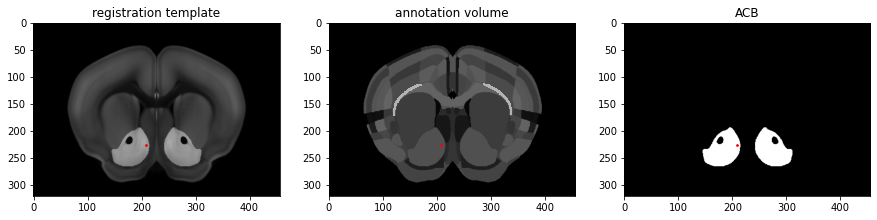

adjusted center - 
x: 208
y: 225
z: 169


In [39]:
#define brain region by acronym
brain_reg='ACB'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
x+=39
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('adjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))

# PBN - adjust up a tiny bit (6 voxel) so it is in the region

parabrachial nucleus ?

This is PB in allen

z min: 391
z max: 441
x min: 138
x max: 195
y min: 139
y max: 203


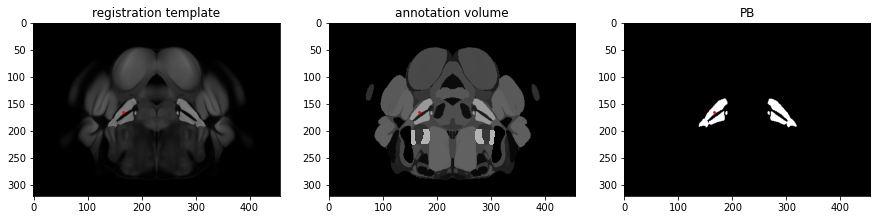

adjusted center - 
x: 166
y: 165
z: 416


In [40]:
#define brain region by acronym
brain_reg='PB'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)
y-=6
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('adjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))

# PO - adjusted: average MPO and LPO z and y but use MPO x coordinate

Sum MPO and LPO

z min: 181
z max: 231
x min: 167
x max: 207
y min: 217
y max: 268


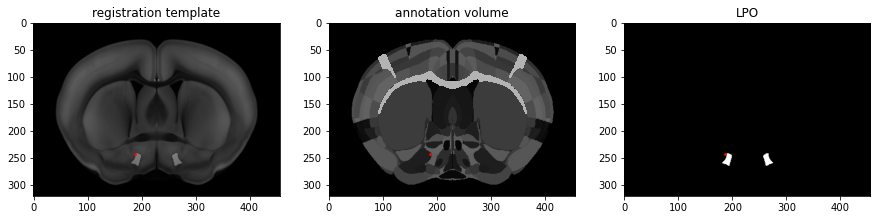

unadjusted center - 
x: 187
y: 242
z: 206


In [41]:
#define brain region by acronym
brain_reg='LPO'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

z min: 187
z max: 233
x min: 190
x max: 226
y min: 229
y max: 270


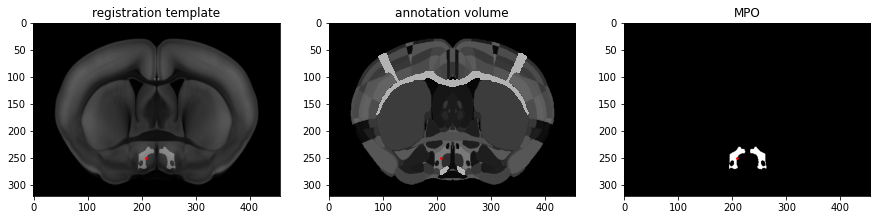

unadjusted center - 
x: 208
y: 249
z: 210


In [42]:
#define brain region by acronym
brain_reg='MPO'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

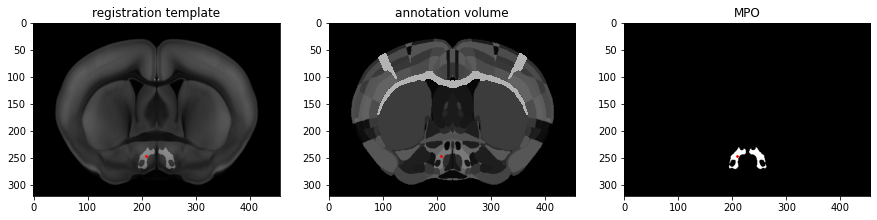

adjusted center - 
x: 208
y: 245
z: 208


In [43]:
#AVERAGE THE ABOVE for Z and Y but just use X value of LSX
x=208
y=int((249+242)/2)
z=int((210+206)/2)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('adjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))

# PVH - use unadjusted

z min: 227
z max: 257
x min: 211
x max: 227
y min: 212
y max: 242


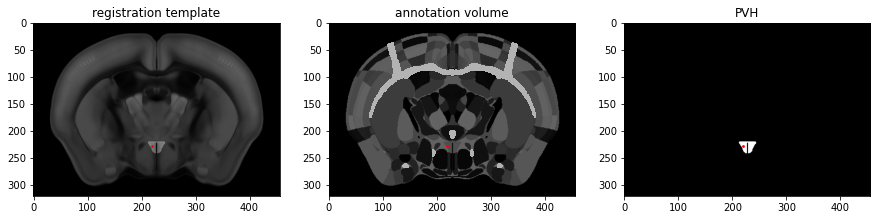

unadjusted center - 
x: 219
y: 227
z: 242


In [44]:
#define brain region by acronym
brain_reg='PVH'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

# Septum - adjusted: average LSX and MS z and y but use LSX x coordinate

The only region containing 'septum' in the allen atlas is the Triangular nucleus of the septum (TRS) but was previously advised to use LSX and MS

z min: 166
z max: 206
x min: 219
x max: 227
y min: 151
y max: 244


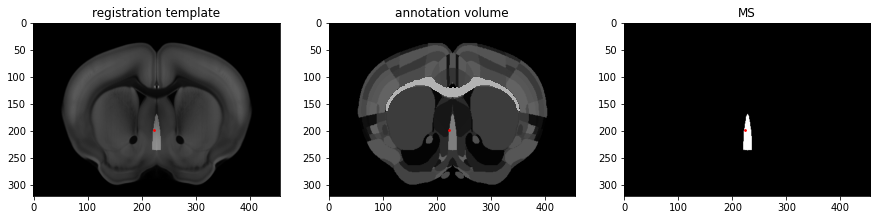

unadjusted center - 
x: 223
y: 197
z: 186


In [45]:
#define brain region by acronym
brain_reg='MS'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

z min: 155
z max: 237
x min: 190
x max: 227
y min: 101
y max: 221


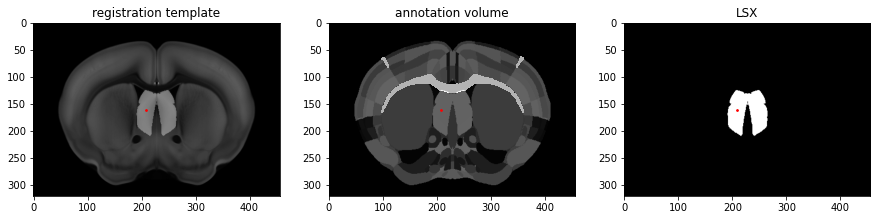

unadjusted center - 
x: 208
y: 161
z: 196


In [46]:
#define brain region by acronym
brain_reg='LSX'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

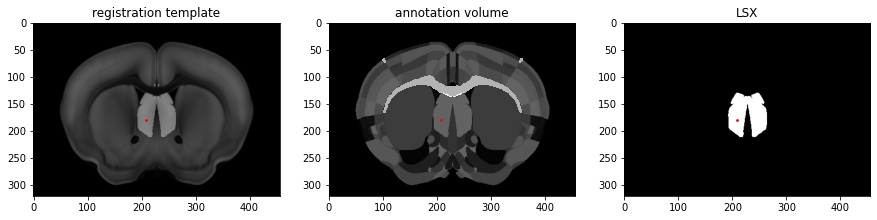

adjusted center - 
x: 208
y: 179
z: 191


In [47]:
#AVERAGE THE ABOVE for Z and Y but just use X value of LSX
x=208
y=int((197+161)/2)
z=int((186+196)/2)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('adjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))

# VP - use unadjusted
 

2021-12-18 17:01:35,731 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_25/structure_835.nrrd


z min: 140
z max: 280
x min: 119
x max: 220
y min: 199
y max: 278


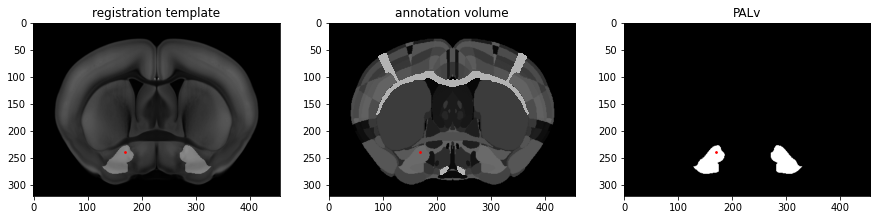

unadjusted center - 
x: 169
y: 238
z: 210


In [48]:
#define brain region by acronym
brain_reg='PALv'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

# ZI - will adjust down

z min: 233
z max: 329
x min: 126
x max: 210
y min: 162
y max: 223


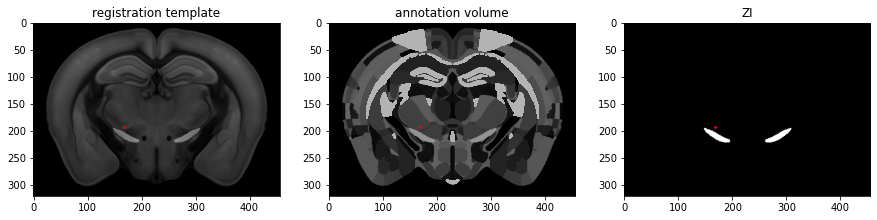

unadjusted center - 
x: 168
y: 192
z: 281


In [49]:
#define brain region by acronym
brain_reg='ZI'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('unadjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))
brain_regs.append(brain_reg)
x_coords.append(x)
y_coords.append(y)
z_coords.append(z)

z min: 233
z max: 329
x min: 126
x max: 210
y min: 162
y max: 223


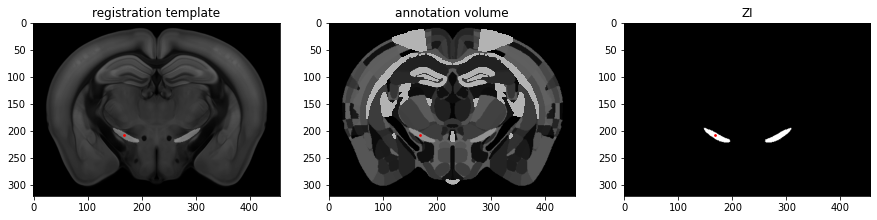

adjusted center - 
x: 168
y: 207
z: 281


In [50]:
#define brain region by acronym
brain_reg='ZI'
brain_reg_num=id_acronym[brain_reg]
region_mask, region_info = mcc.get_structure_mask(brain_reg_num) 
x,y,z=get_center(region_mask)
y+=15
slice_idx = z
region_title=brain_reg
plot_region(slice_idx,region_mask,region_title,x,y)
print('adjusted center - ')
print('x: '+str(x))
print('y: '+str(y))
print('z: '+str(z))

# Save unadjusted centers for allen-defined regions

In [53]:
len(brain_regs)
len(x_coords)
len(y_coords)
len(z_coords)
import numpy as np

In [59]:
len(brain_regs)

36

In [54]:
len(np.unique(brain_regs))

36

In [62]:
import pandas as pd
zipped = list(zip(brain_regs,x_coords,y_coords,z_coords))
df = pd.DataFrame(zipped, columns=['brain_region','x_vox','y_vox','z_vox'])
df.to_csv('allen_brain_reg_coords.csv')

# Save adjusted centers of rabies-exp-defined regions 

# Not done yet

In [60]:
node_input =['PL', 'ILA', 'ORB', 'GU', 'AI', 'MOs', 'MOp','GPe','GPi','STRd','PALv',
             'BST','MEA', 'AAA', 'NLOT', 'COA', 'BMA', 'NDB','PVH','LH','MH','CEA',
             'LHA','ZI','DR','PAG','LDT','PB','CBN','ACB','LPO','MPO','MS','LSX','MA','EPv']
len(np.unique(node_input))

36

In [61]:
len(node_input)

36